# Alex Gagliano
#### Fundamentals of Data Science, Homework #1 
#### Due February 6th, 2020

# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on its surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

In [196]:
import os
import matplotlib.pyplot as plt
from astropy.io import fits
import seaborn as sns 

os.chdir("/home/alexgagliano/Downloads/HLCData")
#image_data = fits.getdata("HLC.RA_00_to_01.fits",ext=1)

from astropy.table import Table

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

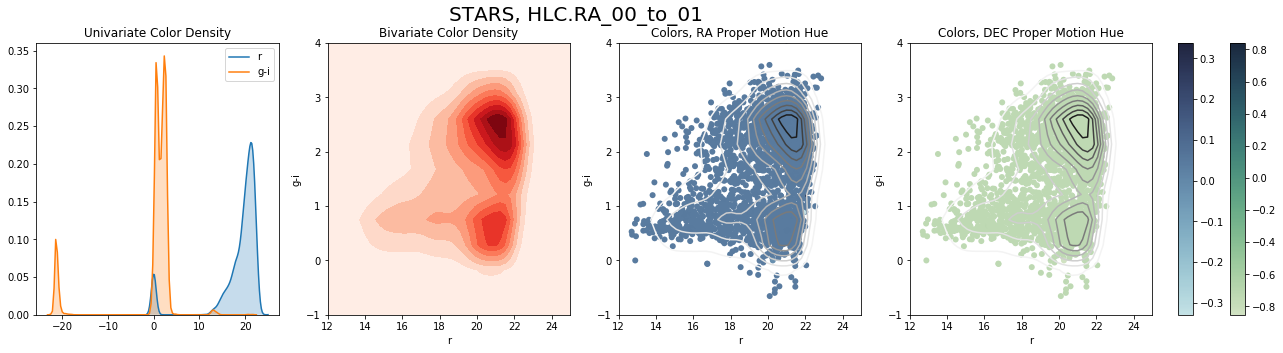

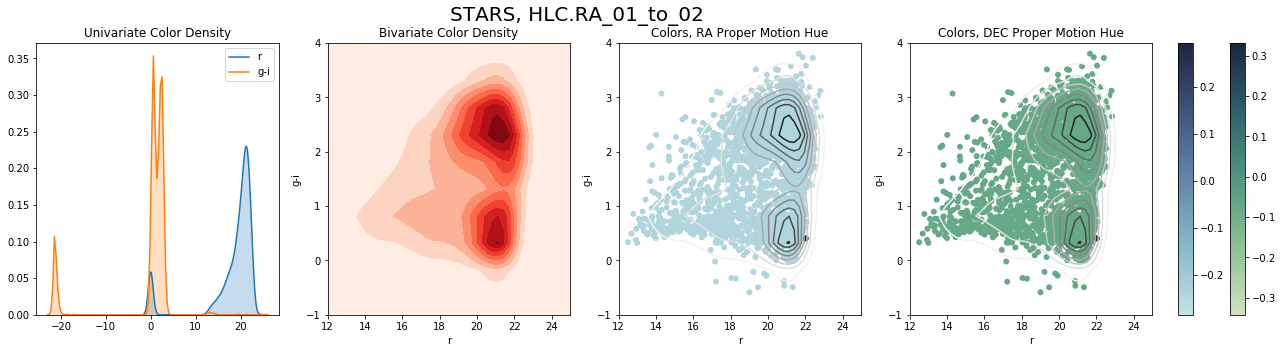

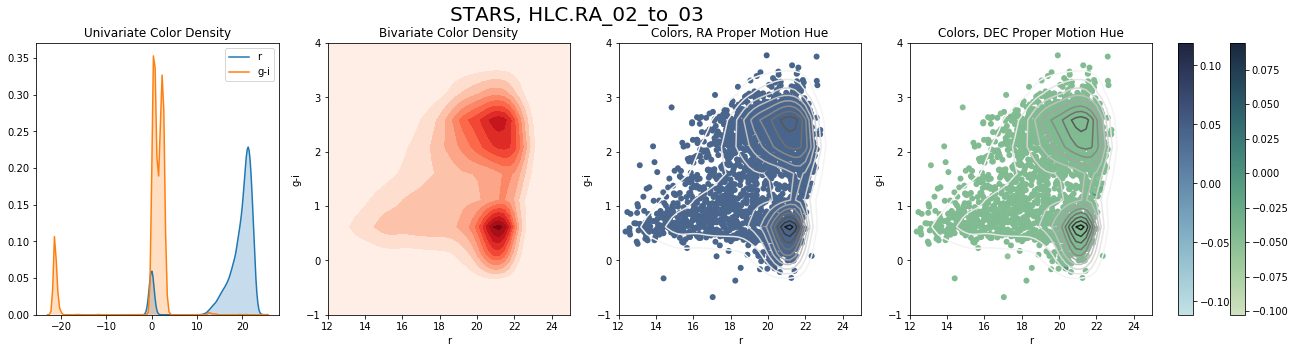

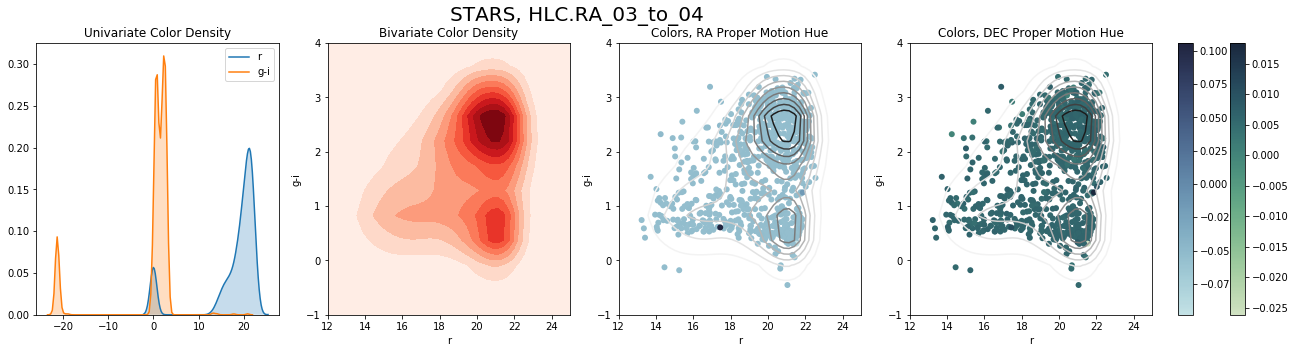

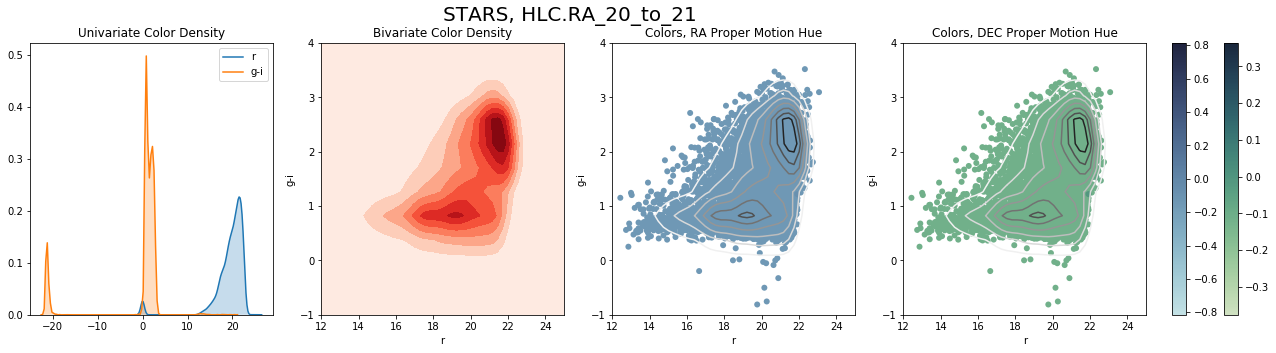

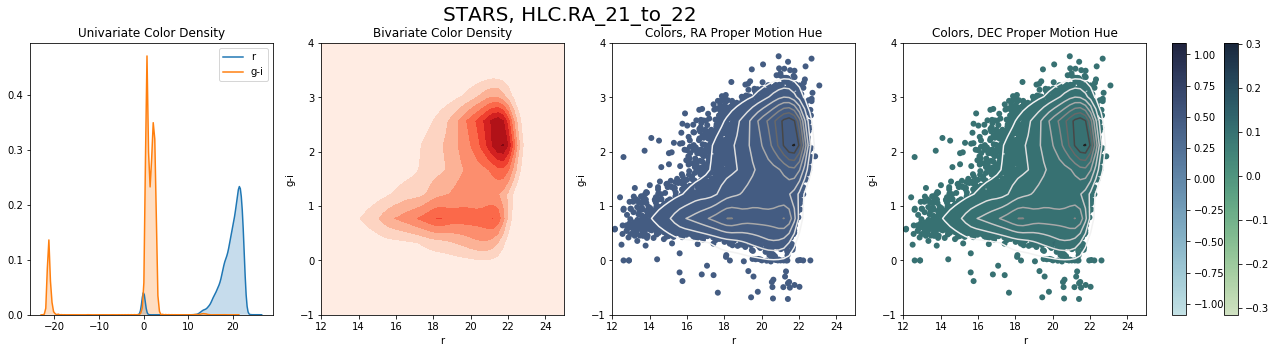

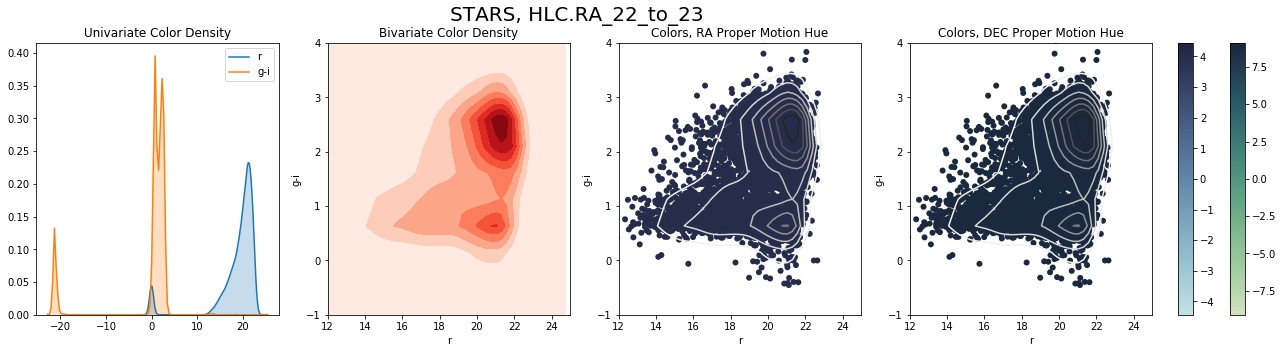

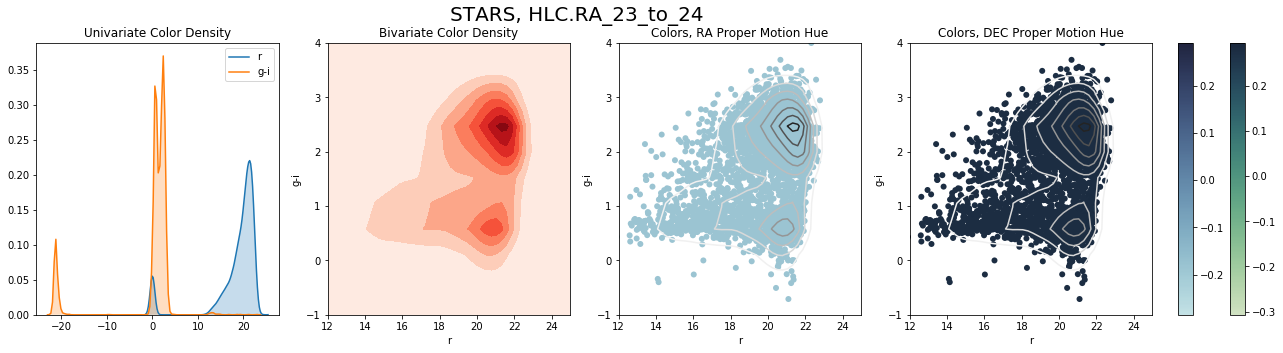

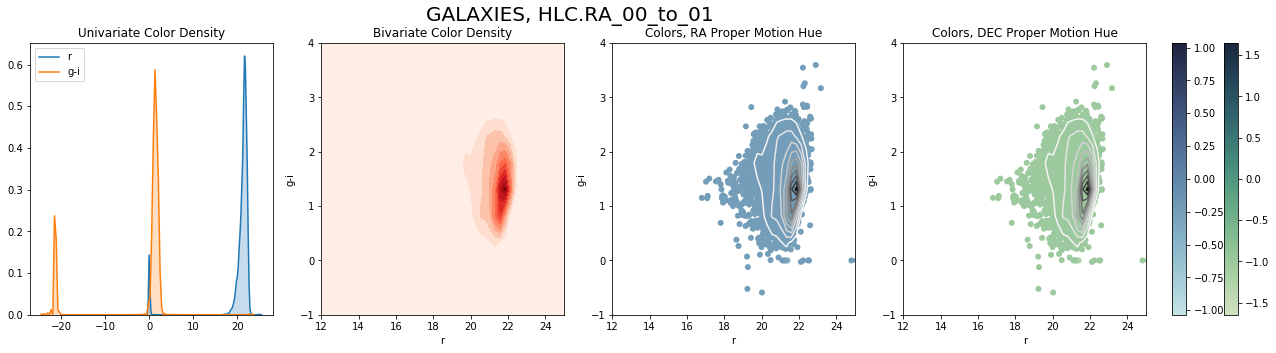

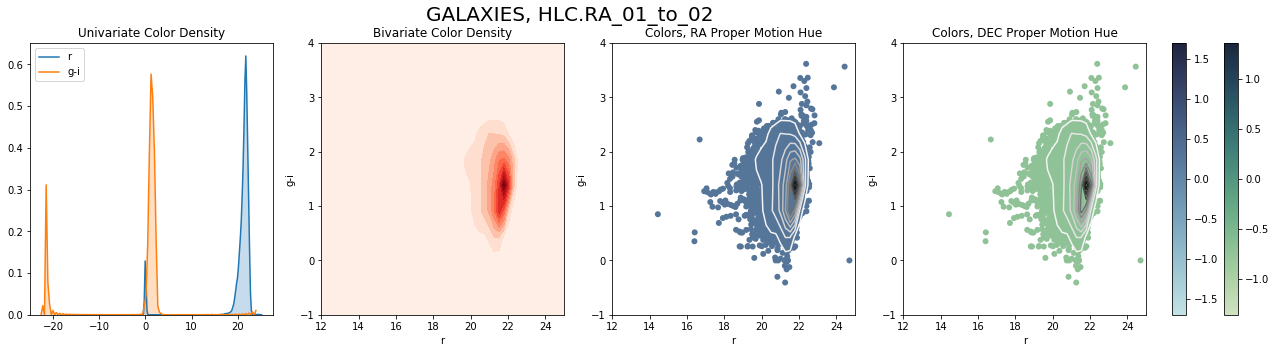

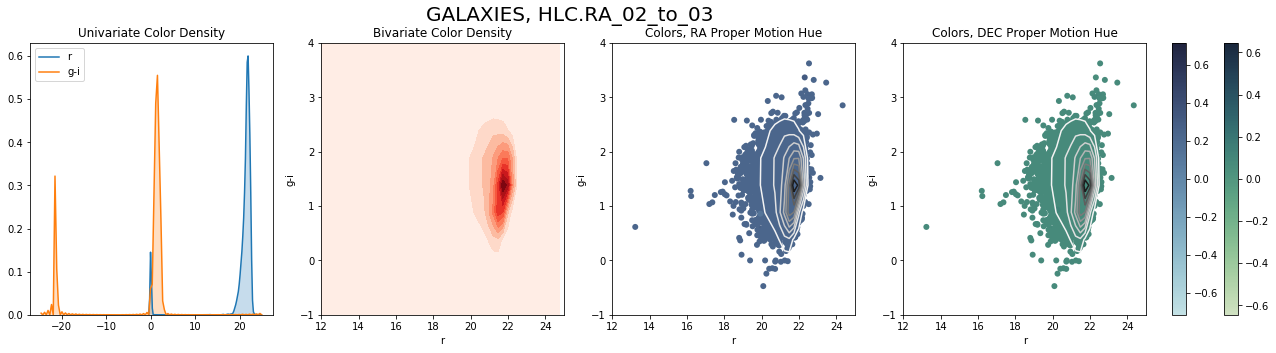

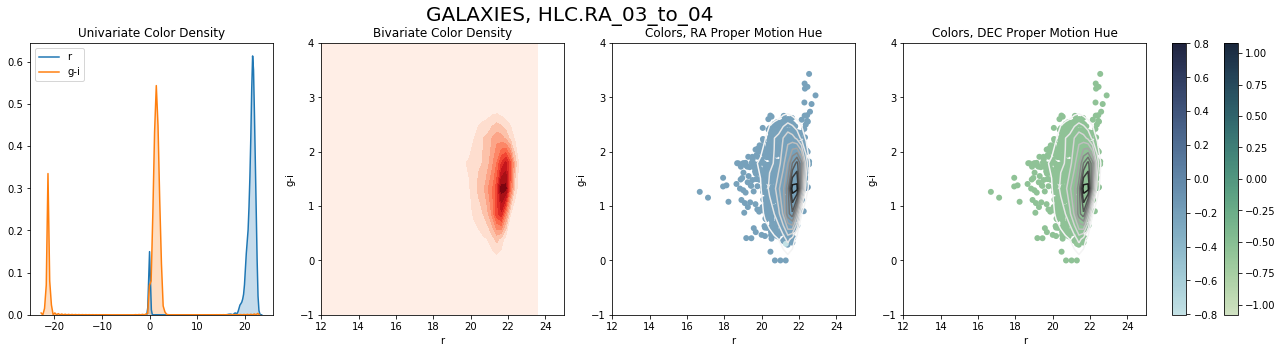

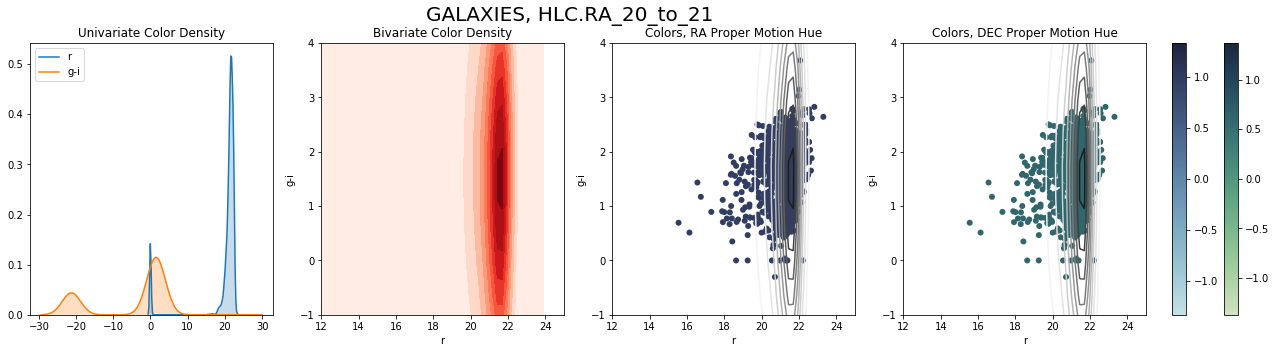

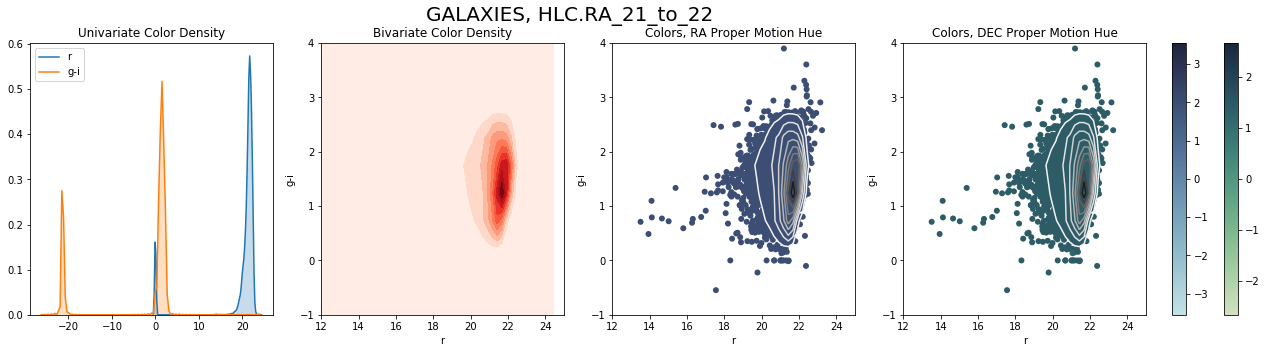

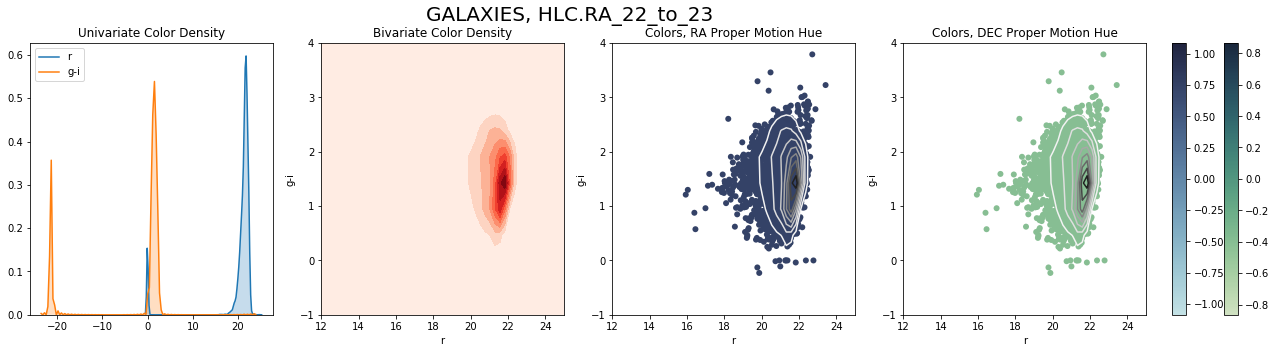

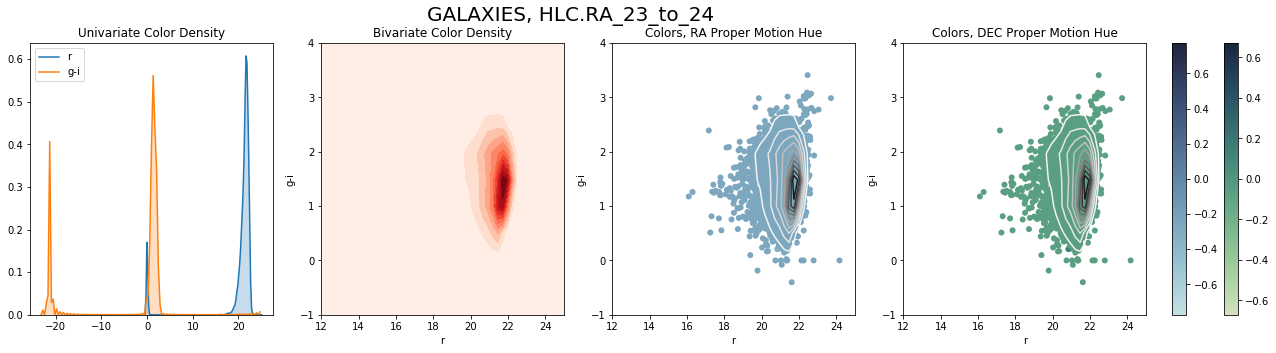

In [212]:
from os import listdir
from os.path import isfile, join
import pandas as pd

files = sorted([f for f in listdir('.') if isfile(join('.', f))])

def four_panel(dat, string):
    if string == "stars":
        df = dat[dat['MEAN_OBJECT_TYPE'] > 5.0]
    elif string == "galaxies":
        df = dat[dat['MEAN_OBJECT_TYPE'] <= 5.0]
    
    g_i = df['MEAN_PSFMAG'][:,1] - df['MEAN_PSFMAG'][:,3]
    r = df['MEAN_PSFMAG'][:,2]
    
    fig, axs = plt.subplots(ncols=4,figsize=(20,5))

    # let's plot every 50th point to make it a bit more reasonable to manipulate
    plot_df = pd.DataFrame({'r':r[::50], 'g-i':g_i[::50], 'RA_pm':df['RA_PM'][::50], 'DEC_pm':df['DEC_PM'][::50]})

    sns.kdeplot(plot_df["r"], ax=axs[0], shade=True)
    sns.kdeplot(plot_df["g-i"],ax=axs[0], shade=True)

    #sns.kdeplot(plot_df["DEC_pm"], ax=axs[4], shade=True)
    #sns.kdeplot(plot_df["RA_pm"],ax=axs[4], shade=True)
    #axs[4].set_title("RA, DEC Univariate Density")
    
    axs[1].set_xlim((12, 25))
    axs[2].set_xlim((12, 25))
    axs[3].set_xlim((12, 25))

    axs[1].set_ylim((-1, 4))
    axs[2].set_ylim((-1, 4))
    axs[3].set_ylim((-1, 4))

    fig.suptitle("%s" % string.upper() + ", " + file.strip(".fits"), fontsize=20)
    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    cmap2 = sns.cubehelix_palette(rot=-.5, as_cmap=True)
    
    std = np.std(plot_df['RA_pm'])
    
    norm = plt.Normalize(np.median(plot_df['RA_pm']) - std, np.median(plot_df['RA_pm']) + std)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
   
    std = np.std(plot_df['DEC_pm'])

    norm2 = plt.Normalize(np.median(plot_df['DEC_pm']) - std,np.median(plot_df['DEC_pm']) + std)
    sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
    sm2.set_array([])
    
    sns.kdeplot(plot_df["r"], plot_df["g-i"], ax=axs[1], cmap='Reds', shade=True)
    sns.kdeplot(plot_df["r"], plot_df["g-i"], ax=axs[2], cmap='Greys', shade=False)
    sns.kdeplot(plot_df["r"], plot_df["g-i"], ax=axs[3], cmap='Greys', shade=False)
    p1 = sns.scatterplot(x="r", y="g-i", data=plot_df, hue='RA_pm', ax=axs[2],linewidth=0,palette=cmap)
    p2 = sns.scatterplot(x="r", y="g-i", data=plot_df, hue='DEC_pm',ax=axs[3],linewidth=0,palette=cmap2)
    
    box = axs[3].get_position()

    # create color bar
    axColor = plt.axes([box.x0*1.02 + box.width * 1.02, box.y0, 0.01, box.height])
    axColor2 = plt.axes([box.x0*1.06 + box.width * 1.06, box.y0, 0.01, box.height])
    
    p1.get_legend().remove()
    p1.figure.colorbar(sm,pad=0.05, cax=axColor, fraction=0.01)
    
    p2.get_legend().remove()
    p2.figure.colorbar(sm2,pad=0.05,cax=axColor2, fraction=0.01)
    
    axs[0].set_title("Univariate Color Density")
    axs[1].set_title("Bivariate Color Density")
    axs[2].set_title("Colors, RA Proper Motion Hue")
    axs[3].set_title("Colors, DEC Proper Motion Hue")
    
    plt.show()

for obj in ['stars', 'galaxies']:
    for file in files:
        dat = Table.read("%s"%file, format='fits')
        four_panel(dat, obj)

Comment on the structure in stars vs galaxies, and the evolution with 
position on the sky in each HLC.

Across all of the bands, we see a prominent bimodality in stellar colors - one centered around (g-i) = 0.75 and the other centered near (g-i) = 2.5. This corresponds to a population of blue and red stars, respectively. The univariate plot reflects this same (g-i)  bimodality - we have zoomed in on the central peaks in the right three plots. This bimodality does not exist in r-band observations (excluding the non-physical 0 values), but we do see a leftward skew in r-mag in both stars and galaxy plots. This reflects the Eddington bias, as there are many more faint objects than bright ones. We can also see by the proper motion plots that, aside from a few outliers, the proper motions of objects are in the same direction and at nearly the same rates. Most prominent are the stars in band 22-23, which features the highest proper motion in both RA and DEC. For the galaxies, we see a huge spread in (g-i) in band 20-21, both in the zoomed central peak and in the outlier distribution (centered around -22). This warrants further study. 

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

os.chdir("/home/alexgagliano/Documents/spring2020/596_DataSci/ast596_2020_Spring/data/01")
stats = pd.read_csv("IntroStat_demo.csv")

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

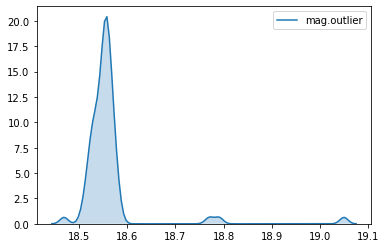

In [4]:
mag = stats['mag.outlier']
sns.kdeplot(mag, shade=True)

I'd estimate the mean as ~18.55 and the standard deviation as 0.25, which would make the variance 0.25^2 = 0.06. Seeing how we did: 

In [5]:
mu = np.mean(mag)
sd = np.std(mag)
var = sd**2

print("mu = {:.3f}, var = {:.3f}.".format(mu, var))

mu = 18.561, var = 0.005.


Not too bad! Plotting this mean over our data: 

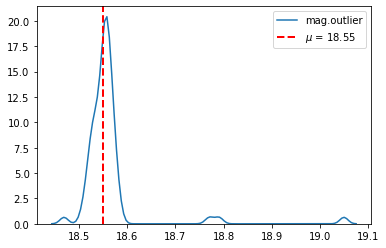

In [213]:
sns.kdeplot(mag)
plt.axvline(x=mu, linestyle='--', lw=2, c='r', label='$\mu$ = %.2f'%mu)
plt.legend()

*Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it.

Okay!

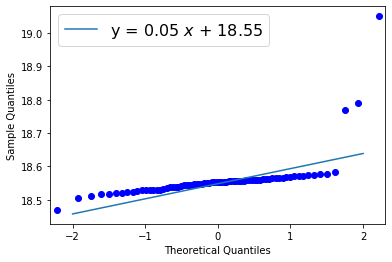

In [214]:
import statsmodels.api as sm
sm.qqplot(mag)
x = np.linspace(-2, 2, num=100)
plt.plot(x, mu+np.sqrt(var)*x, label=r'y = %.2f $x$ + %.2f'%(np.sqrt(var), mu))
plt.legend(fontsize=16)
plt.show()

We see that the fit isn't a great one, because there are extreme outliers at the higher end of the distribution (and we see this in the earlier kde plot). 

*Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)*

This is done below:

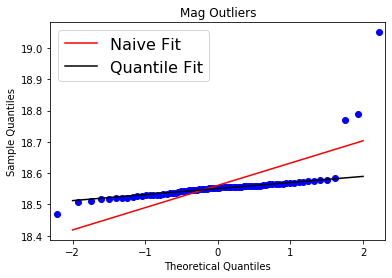

In [8]:
Q1 = np.quantile(mag, .25)
Q3 = np.quantile(mag, .75)

norms = np.random.normal(size=1000)

Q1_norm = np.quantile(norms, .25)
Q3_norm = np.quantile(norms, .75)

m = (Q3-Q1)/(Q3_norm-Q1_norm)
b = Q1 - m*Q1_norm
sm.qqplot(mag)
plt.plot(x, mu+np.sqrt(var)*x, c='r', label='Naive Fit')
plt.plot(x, m*x+b, c='k', label='Quantile Fit')
plt.legend(fontsize=16)
plt.title("Mag Outliers")
plt.show()

We see that our fit has greatly improved, because now we're actually considering the underlying distribution in our fit instead of assuming a gaussian. 

*Now try the same thing with `mag.het`. Describe what you found?*


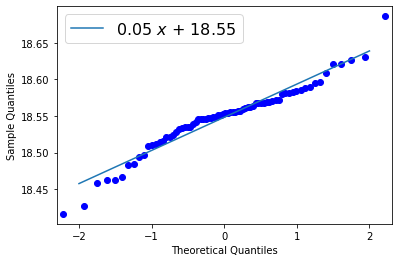

In [13]:
het = stats['mag.het']
mu = np.mean(het)
var = np.std(het)**2
sm.qqplot(het)
x = np.linspace(-2, 2, num=100)
plt.plot(x, mu+np.sqrt(var)*x, label=r'%.2f $x$ + %.2f'%(np.sqrt(var), mu))
plt.legend(fontsize=16)
plt.show()

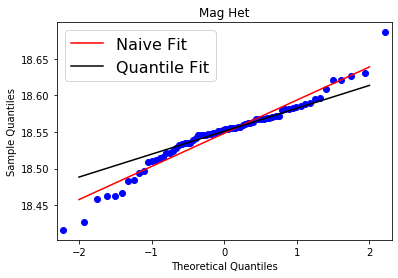

In [14]:
Q1 = np.quantile(het, .25)
Q3 = np.quantile(het, .75)
m = (Q3-Q1)/(Q3_norm-Q1_norm)
b = Q1 - m*Q1_norm
sm.qqplot(het)
plt.plot(x, mu+np.sqrt(var)*x, c='r', label='Naive Fit')
plt.plot(x, m*x+b, c='k', label='Quantile Fit')
plt.legend(fontsize=16)
plt.title("Mag Het")
plt.show()

Interestingly enough, it looks like the quantile fit at first glance is a worse fit to the data. In reality, the quantile fit is more accurately capturing the central 50% of the data as it did before. Here, though, the tails reflect an important feature of the data, whereas before they seemed to be extraneous outliers. 

*What happens if you rescale the data? Subtract off the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity.*

Here goes: 

In [15]:
het_norm = np.abs(het - mu)/ (stats['mag.het.error'])
mu_norm = np.mean(het_norm)
var_norm = np.std(het_norm)**2

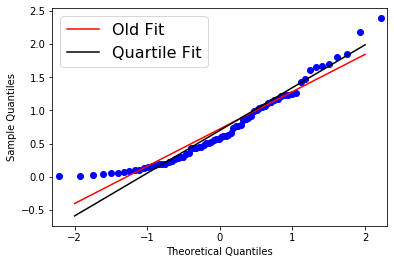

In [16]:
x = np.linspace(-2, 2, num=100)

Q1 = np.quantile(het_norm, .25)
Q3 = np.quantile(het_norm, .75)
m = (Q3-Q1)/(Q3_norm-Q1_norm)
b = Q1 - m*Q1_norm
sm.qqplot(het_norm);
plt.plot(x, mu_norm+np.sqrt(var_norm)*x, c='r', label='Old Fit');
plt.plot(x, m*x+b, c='k', label='Quartile Fit');
plt.legend(fontsize=16)
plt.show()

*Describe what's going on.*

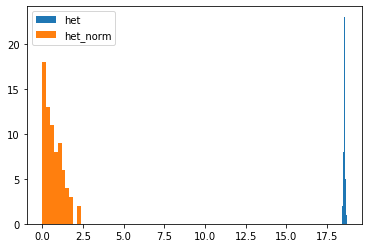

In [215]:
plt.hist(het, label='het'); plt.hist(het_norm, label='het_norm'); plt.legend();

I'm not entirely sure what's going on, but my guess is that normalizing the data allows us to more readily see the underlying distribution and compare it to a normal distribution. It's also possible that the noise in the data being normally distributed nearly convinced us that the underlying process was too. Removing this, we see that the process actually proceeds like a poisson process, as evidenced by the leftmost distribution having a strong right skew. The qq plot of the normalized data shows this skew quite nicely, and it is not obvious in the earlier plot. 

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

In [18]:
os.chdir("/home/alexgagliano/Documents/spring2020/596_DataSci/ast596_2020_Spring/data/01")
ceph = pd.read_csv("Cepheids.csv")

*Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.*

In [27]:
cephs_LMC = ceph[ceph['Cloud'] == 'LMC']
cephs_SMC = ceph[ceph['Cloud'] == 'SMC']

cephs_SMC_1 = cephs_SMC[cephs_SMC['Mode'] == '1']
cephs_SMC_F = cephs_SMC[cephs_SMC['Mode'] == 'F']

cephs_LMC_1 = cephs_LMC[cephs_LMC['Mode'] == '1']
cephs_LMC_F = cephs_LMC[cephs_LMC['Mode'] == 'F']

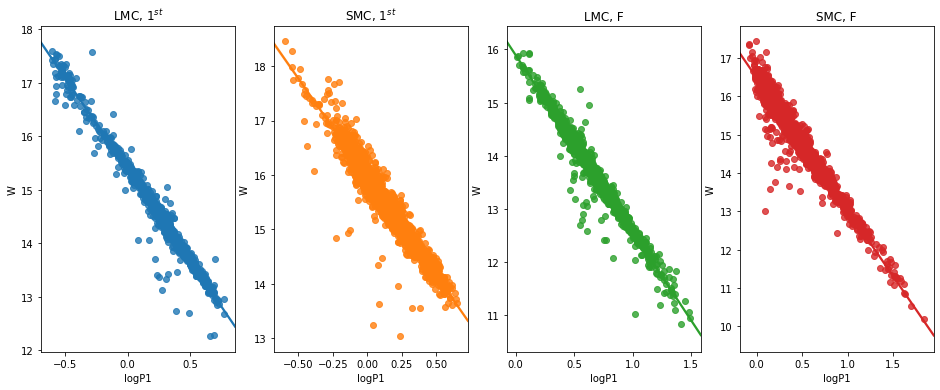

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,6))

p1 = sns.regplot(x=cephs_LMC_1['logP1'], y=cephs_LMC_1['W'], ax=ax1)
p2 = sns.regplot(x=cephs_SMC_1['logP1'], y=cephs_SMC_1['W'], ax=ax2)
p3 = sns.regplot(x=cephs_LMC_F['logP1'], y=cephs_LMC_F['W'], ax=ax3)
p4 = sns.regplot(x=cephs_SMC_F['logP1'], y=cephs_SMC_F['W'], ax=ax4)

ax1.set_title(r"LMC, $1^{st}$");
ax2.set_title(r"SMC, $1^{st}$");
ax3.set_title("LMC, F");
ax4.set_title("SMC, F");

*Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)*

*Compute the residuals of each sample to its respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)*

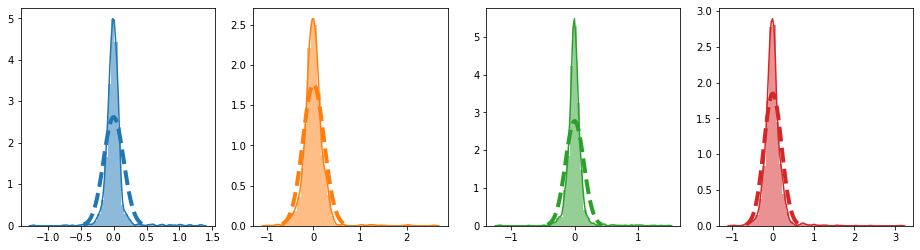

In [163]:
import scipy.stats
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
reg1 = LinearRegression().fit(np.array(cephs_LMC_1['logP1']).reshape(-1, 1), cephs_LMC_1['W'])
m1 = reg1.coef_
b1 = reg1.intercept_

reg2 = LinearRegression().fit(np.array(cephs_SMC_1['logP1']).reshape(-1, 1), cephs_SMC_1['W'])
m2 = reg2.coef_
b2 = reg2.intercept_

reg3 = LinearRegression().fit(np.array(cephs_LMC_F['logP1']).reshape(-1, 1), cephs_LMC_F['W'])
m3 = reg3.coef_
b3 = reg3.intercept_

reg4 = LinearRegression().fit(np.array(cephs_SMC_F['logP1']).reshape(-1, 1), cephs_SMC_F['W'])
m4 = reg4.coef_
b4 = reg4.intercept_

y1 = m1*cephs_LMC_1['logP1'] + b1
y2 = m2*cephs_SMC_1['logP1'] + b2
y3 = m3*cephs_LMC_F['logP1'] + b3
y4 = m4*cephs_SMC_F['logP1'] + b4

resid_1 = y1 - cephs_LMC_1['W']
resid_2 = y2 - cephs_SMC_1['W']
resid_3 = y3 - cephs_LMC_F['W']
resid_4 = y4 - cephs_SMC_F['W']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,4))

mu1 = np.mean(resid_1)
std1 = np.std(resid_1)
x1 = np.linspace(mu1 - 3*std1, mu1 + 3*std1, 100)

mu2 = np.mean(resid_2)
std2 = np.std(resid_2)
x2 = np.linspace(mu2 - 3*std2, mu2 + 3*std2, 100)

mu3 = np.mean(resid_3)
std3 = np.std(resid_3)
x3 = np.linspace(mu3 - 3*std3, mu3 + 3*std3, 100)

mu4 = np.mean(resid_4)
std4 = np.std(resid_4)
x4 = np.linspace(mu4 - 3*std4, mu4 + 3*std4, 100)


sns.distplot(resid_1, hist_kws=dict(alpha=0.5), ax=ax1, color='tab:blue')
sns.distplot(resid_2, hist_kws=dict(alpha=0.5), ax=ax2, color='tab:orange')
sns.distplot(resid_3, hist_kws=dict(alpha=0.5), ax=ax3, color='tab:green')
sns.distplot(resid_4, hist_kws=dict(alpha=0.5), ax=ax4, color='tab:red')

ax1.plot(x1, stats.norm.pdf(x1, mu1, std1), '--', lw=4, color='tab:blue')
ax2.plot(x2, stats.norm.pdf(x2, mu2, std2), '--', lw=4, color='tab:orange')
ax3.plot(x3, stats.norm.pdf(x3, mu3, std3), '--', lw=4, color='tab:green')
ax4.plot(x4, stats.norm.pdf(x4, mu4, std4), '--', lw=4, color='tab:red')

It looks like the residuals are significantly more centrally peaked than a normal distribution might be (i.e. less data in the tails). Let's see if the qq plots confirm this: 

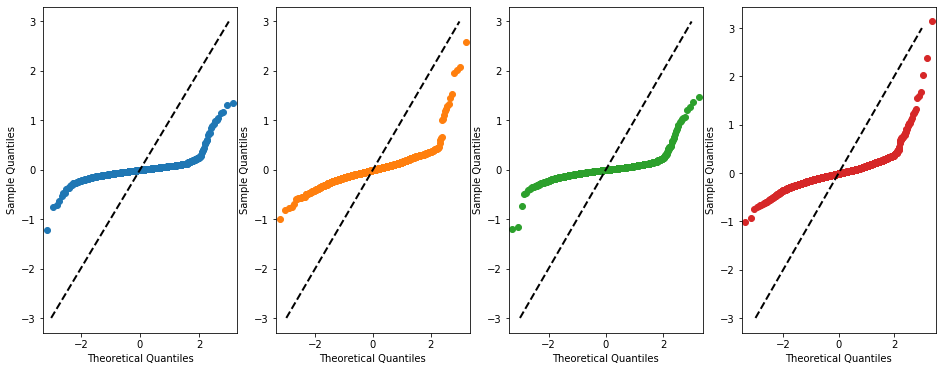

In [164]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,6))

sm.qqplot(resid_1, ax=ax1, color='tab:blue');
ax1.plot(np.linspace(-3, 3), np.linspace(-3,3), '--', lw=2, c='k')
sm.qqplot(resid_2, ax=ax2, color='tab:orange');
ax2.plot(np.linspace(-3, 3), np.linspace(-3,3), '--', lw=2, c='k')
sm.qqplot(resid_3, ax=ax3, color='tab:green');
ax3.plot(np.linspace(-3, 3), np.linspace(-3,3), '--', lw=2, c='k')
sm.qqplot(resid_4, ax=ax4, color='tab:red');
ax4.plot(np.linspace(-3, 3), np.linspace(-3,3), '--', lw=2, c='k')

Deeply non-normal! It looks like we have some pretty strong deviations from normality at the tails of the distributions, which was confirmed by our earlier comparison. Why would this be? Unclear. Maybe the fact that Cepheids are extremely bright allows the correlation to present itself above the gaussian noise of the background? 

*Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).*

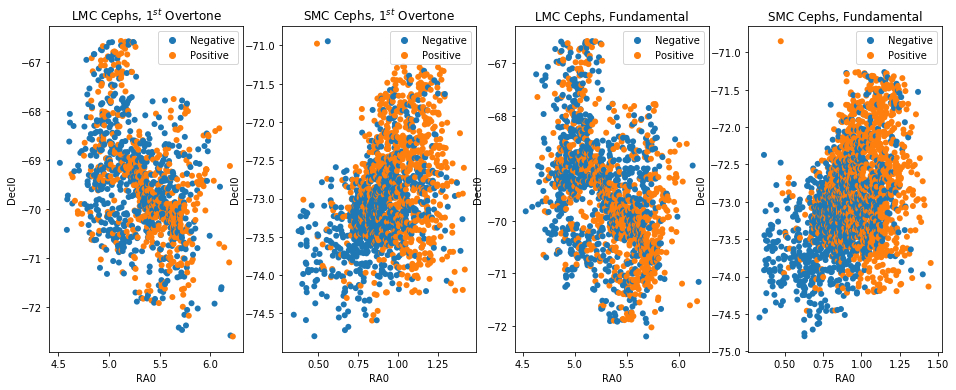

In [193]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,6))

r1_class = ["Positive"]*len(resid_1)
r1_class = np.array(r1_class)
r1_class[(resid_1 < 0.0)] = "Negative"
sns.scatterplot(x=cephs_LMC_1['RA0'], y=cephs_LMC_1['Decl0'],hue=r1_class, ax=ax1,linewidth=0)

r2_class = ["Positive"]*len(resid_2)
r2_class = np.array(r2_class)
r2_class[(resid_2 < 0.0)] = "Negative"
sns.scatterplot(x=cephs_SMC_1['RA0'], y=cephs_SMC_1['Decl0'],hue=r2_class, ax=ax2,linewidth=0)

r3_class = ["Positive"]*len(resid_3)
r3_class = np.array(r3_class)
r3_class[(resid_3 < 0.0)] = "Negative"
sns.scatterplot(x=cephs_LMC_F['RA0'], y=cephs_LMC_F['Decl0'],hue=r3_class, ax=ax3,linewidth=0)

r4_class = ["Positive"]*len(resid_4)
r4_class = np.array(r4_class)
r4_class[(resid_4 < 0.0)] = "Negative"
sns.scatterplot(x=cephs_SMC_F['RA0'], y=cephs_SMC_F['Decl0'],hue=r4_class, ax=ax4,linewidth=0)

ax1.set_title(r"LMC Cephs, 1$^{st}$ Overtone");
ax2.set_title(r"SMC Cephs, 1$^{st}$ Overtone");
ax3.set_title(r"LMC Cephs, Fundamental");
ax4.set_title(r"SMC Cephs, Fundamental");

It looks like the negative and positive residuals are separable in RA, DEC space (at least for SMC, the second and fourth plots). I wonder if this indicates that the Small Magellenic Cloud is rotating. This would send the bottom left Cepheids away from us and the top right Cepheids toward us in its bulk motion. 

*Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.*

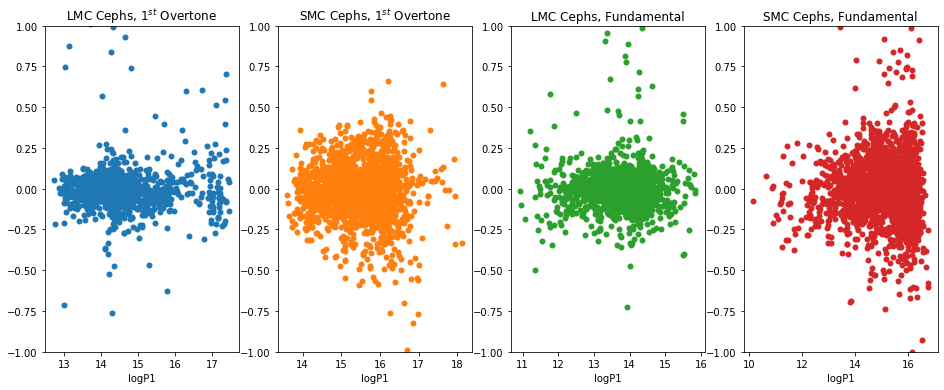

In [216]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,6))

sns.scatterplot(y1, resid_1, ax=ax1, color='tab:blue',linewidth=0)
sns.scatterplot(y2, resid_2, ax=ax2, color='tab:orange',linewidth=0)
sns.scatterplot(y3, resid_3, ax=ax3, color='tab:green',linewidth=0)
sns.scatterplot(y4, resid_4, ax=ax4, color='tab:red',linewidth=0)

ax1.set_ylim((-1, 1));
ax2.set_ylim((-1, 1));
ax3.set_ylim((-1, 1));
ax4.set_ylim((-1, 1));

ax1.set_title(r"LMC Cephs, 1$^{st}$ Overtone");
ax2.set_title(r"SMC Cephs, 1$^{st}$ Overtone");
ax3.set_title(r"LMC Cephs, Fundamental");
ax4.set_title(r"SMC Cephs, Fundamental");

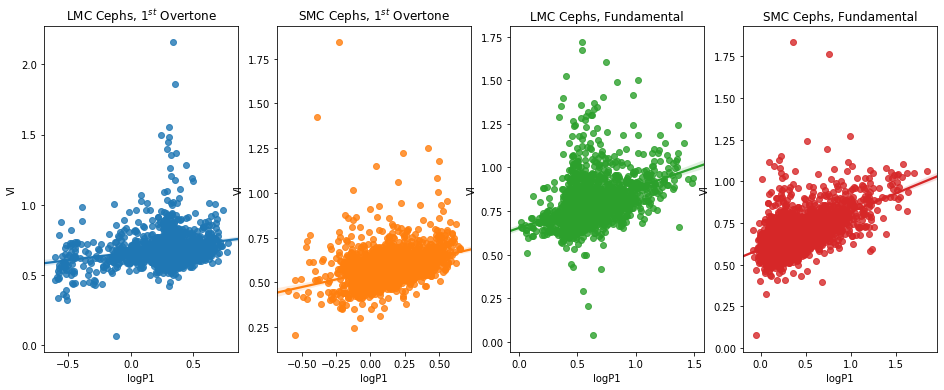

In [221]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,6))

sns.regplot(x=cephs_LMC_1['logP1'], y=cephs_LMC_1['VI'], ax=ax1, color='tab:blue')
sns.regplot(x=cephs_SMC_1['logP1'], y=cephs_SMC_1['VI'], ax=ax2, color='tab:orange')
sns.regplot(x=cephs_LMC_F['logP1'], y=cephs_LMC_F['VI'], ax=ax3, color='tab:green')
sns.regplot(x=cephs_SMC_F['logP1'], y=cephs_SMC_F['VI'], ax=ax4, color='tab:red')

ax1.set_title(r"LMC Cephs, 1$^{st}$ Overtone");
ax2.set_title(r"SMC Cephs, 1$^{st}$ Overtone");
ax3.set_title(r"LMC Cephs, Fundamental");
ax4.set_title(r"SMC Cephs, Fundamental");

In the above picture, we can see that we still have a relationship between $V-I$ color and the period of the Cepheid (we subtract $V-I$ in the equation for $W$, so the line has a positive slope this time), but there's significantly more scatter than there was before. This is because $V-I$ is linked to the amplitude of light in magnitudes (I found this from Cecilia Payne's original paper), and therefore to the luminosity. However, $V-I$ is affected by dust and distance and metallicity in ways that can't be easily corrected for, so the relationship is much less clean. 